# Enaxis Data Science Regression Algorithms Starter-Kit with Python

We are in 2017 and every Fortune 500 company is talking about leveraging A.I. & machine learning algorithms to future proof their business.  Leading scientists are predicting Moore's Law for technology is becoming impossible and the shift will focus on making computers more accessible to our species.   
We see the [effects of machine learning](https://www.forbes.com/sites/bernardmarr/2016/09/30/what-are-the-top-10-use-cases-for-machine-learning-and-ai/#63c6398e94c9) escalating to make everyday life more personalized to everyone.  Online shopping recommendation, auto-enhancing selfies, self-driving cars, or even unlocking our phones are driven by machine learning technology.  

Like most people, everyone is pondering on how machine learning operates in the background? Well machine learning algorithms are divided based on the data available.  

In this blog, we will focus on trying out building a regression model (What numeric value are you trying to predict or forecast?) in Python on a public dataset.  If you are new to programming or even Data Science, this would be a perfect starting point to get hands on experience.  As Benjamin Franklin always said during his time, “Tell me I forget. Teach me I remember. Involve me I learn.”  In efforts to keep this tutotial less intimidating to follow, I wll lightly touch on your typical Data Science procedures, but leave a recommended link for those who seek a more in-depth guide. Afterall, we live in the age where “Googling” is the norm for learning a new subject as soon as possible.

<a id='toc'></a>
## Table of Content
These are hyperlinks so you can jump to different parts of this tutorial.

## [I. Data Science Enviroment Setup](#setup)
## [II. Data Ingestion](#ingestion)
## [III. Data Pre-Processing](#preprocessing)
## [IV. Regression Modeling](#regression)

<a id='setup'></a>
### Setup your Data Science Enviroment

Step 1. [Download Anaconda based on your system specification](https://www.anaconda.com/download/).

Step 2. Open Command Prompt from your start menu.

Step 3. Type "jupyter notebook".

Step 4. Create a folder for all your Data Science Experiments.

Step 5. Create a new python 3 file and follow the tutorial below.

> For a more in depth guide, please click [here](https://medium.com/k-folds/setting-up-a-data-science-environment-5e6fd1cbd572).

<a id='ingestion'></a>
### Data Ingestion
[Back to Table of Content](#toc)

#### Importing your python Data Science Libraries.

In [47]:
# <-- By the way, hastags are used to write comments in Python.
#I will be commenting most of the code to give context to what is happening.

#dataframe library, we call it with variable "pd"
import pandas as pd

#matrix and math library, we call it with variable "np"
import numpy as np

#python system libraries to hide warning output for cleaner notebook
import warnings
warnings.filterwarnings('ignore')

#execute and view python code in any IPython IDE
%matplotlib inline

#print produces a written output after executing your code
print("Initial Python libraries are now ready for usage.")
print("-------------------------------------")

Initial Python libraries are now ready for usage.
-------------------------------------


#### Uploading or referencing a dataset
For other different methods of uploading a dataset examples, please click [here](https://chrisalbon.com/python/pandas_dataframe_importing_csv.html).

In [52]:
#Link from the UC Irvine public dataset on Forest Fires
url="http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
print("Pull dataset from {}".format(url))
print("-------------------------------------")

#assign a variable to the read URL dataset
dataframe = pd.read_csv(url)

#preview the first 5 rows/index of the dataset
print(dataframe.head(5))
print("-------------------------------------")


Pull dataset from http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
-------------------------------------
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
-------------------------------------


#### Forest Fire Dataset
We will be experimenting with the Forest Fire Data. The target value we will be predicting will be "ISI - Initial Spread Index."  
UC Irvine has kindly provided the full variable descriptions below incase you wanted more details.

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - Fine Fuel Moisture Code Index from the FWI system: 18.7 to 96.20
   6. DMC - Duff Moisture Code Index from the FWI system: 1.1 to 291.3 
   7. DC - Drought Code Index from the FWI system: 7.9 to 860.6 
   8. ISI - Initial Spread Index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform)
    
For more details about the dataset, please refer to the [link](http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names).


For more details about the Fire index, please refer to this [link](http://www.fbfrg.org/cffdrs/fire-weather-index-fwi-system).

<a id='preprocessing'></a>
### Data Pre-Processing
[Back to Table of Content](#toc)

Most dataset you work with requires a lot of data cleaning before modeling.  In this exercise, we asssume most of the data have already been sponged of blanks, bad information, or outliers.

For a further in-depth guide to data pre-processing, please refer [here](https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/)

Data Types
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object
-------------------------------------
Data Statistical Summary
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  

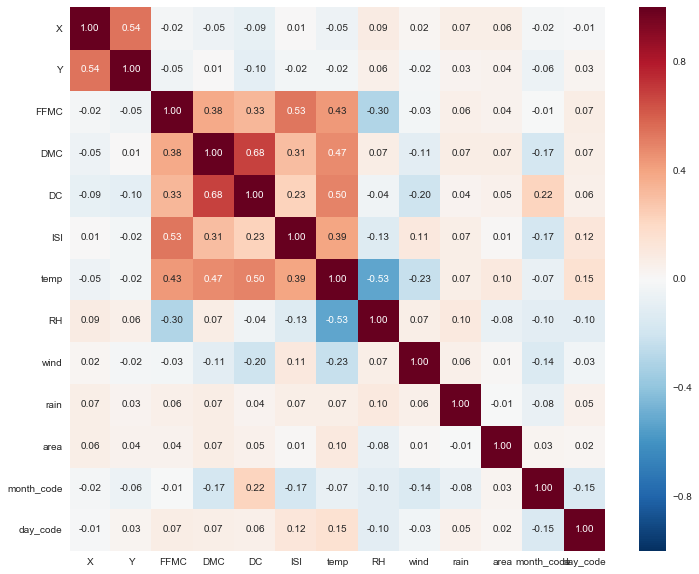

In [53]:
#preview the data type for each columns
print("Data Types")
print(dataframe.dtypes)
print("-------------------------------------")

#code to summarize statistics of your current dataset BEFORE Label Encoding and Data Scaling
print("Data Statistical Summary")
print(dataframe.describe())
print("-------------------------------------")


#sklearn libraries are the Data Science Gold Standard library for Python
#pre-processing library is used for data preparation
from sklearn.preprocessing import LabelEncoder
#create encoding object to convert categorical value to numeric
encode = LabelEncoder()
#create additional 2 columns to convert category columns (Month & Days) into numeric values
dataframe['month_code'] = encode.fit_transform(dataframe['month'])
dataframe['day_code'] = encode.fit_transform(dataframe['day'])

print("Category columns have been encoded for machine learning")
print(dataframe.head(5))
print("-------------------------------------")


#### Data Visualization - Correlation Plot
There are many method to visually analyize your current

In [ ]:
#python math plotting/chart library
import seaborn as sns
import matplotlib.pyplot as plt

#code to plot correlation strength amongst all varaibles/columns
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f")

print("-------------------------------------")

In [22]:
from sklearn.preprocessing import MinMaxScaler
#call scaler function(converting range of value in column from 0-1) from sklearn
scaler = MinMaxScaler()

#filter the dataframe with a variable: train:predictors & target:target

target_column = 'ISI'
#every column except target column
train = dataframe.loc[:, dataframe.columns != target_column]
target = dataframe[target_column]

print("The predicting variables used are: {}".format(list(train)))
print("-------------------------------------")
print("The target variable we are predicting is: {}".format(target_column))
print("-------------------------------------")


#select only numeric columns for data scaling
train = train.select_dtypes(exclude=['object'])
#apply scaler function to the train or predictors dataset
scaled_train = scaler.fit_transform(train)
print("Training dataset have been scaled from 0 to 1.")

#code to summarize statistics of your current dataset AFTER Label Encoding
scaled_features_df = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
print(scaled_features_df.describe())
print("-------------------------------------")

from sklearn.cross_validation import train_test_split
#split the dataset into a training set(80% of the data) and test set(20% of the data)
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size = 0.2)
print("Training dataset have been split and assign to new variables.")
print("@_train set are the 80% of the data.")
print("@_test set are the remaining 20% of the data.")
print("-------------------------------------")

The predicting variables used are: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'temp', 'RH', 'wind', 'rain', 'area', 'month_code', 'day_code']
-------------------------------------
The target variable we are predicting is: ISI
-------------------------------------
Training dataset have been scaled from 0 to 1.
                X           Y        FFMC         DMC          DC        temp  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.458656    0.328544    0.928318    0.378264    0.633329    0.536629   
std      0.289222    0.175700    0.071227    0.220698    0.290918    0.186708   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.285714    0.922581    0.232598    0.504046    0.427653   
50%      0.375000    0.285714    0.940645    0.369400    0.769673    0.549839   
75%      0.750000    0.428571    0.957419    0.486906    0.827958    0.662379   
max      1.000000    1.000000    1.0

<a id='regression'></a>
### Regression Modeling
[Back to Table of Content](#toc)

Regressions' parameters defined.
-------------------------------------
Regression objects assigned to variables.
-------------------------------------
Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   15.3s finished


            importance
feature               
FFMC             0.217
DMC              0.211
DC               0.183
RH               0.086
temp             0.083
wind             0.064
day_code         0.058
area             0.037
X                0.024
Y                0.022
month_code       0.014
rain             0.000

The optimal 4 KFolds Cross Validation Mean score on our training data with a Gradient Boost Machine Regression is 0.6900859269066707
Using the recommended parameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}

The optimal parameters used on the Test Data scored: 0.8035825049090586


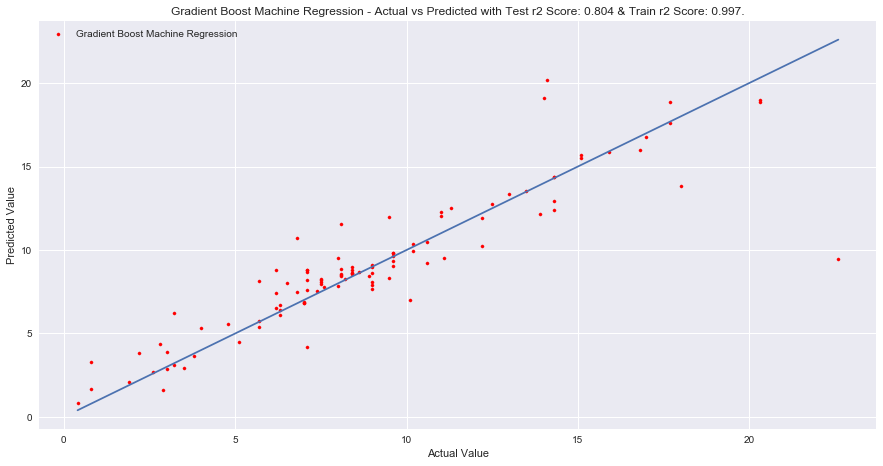

-------------------------------------
Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   11.2s finished


            importance
feature               
FFMC             0.540
DC               0.313
DMC              0.034
wind             0.024
Y                0.022
RH               0.019
day_code         0.017
month_code       0.016
temp             0.008
X                0.006
area             0.002
rain             0.000

The optimal 4 KFolds Cross Validation Mean score on our training data with a AdaBoost Regession is 0.6662670941673774
Using the recommended parameters:
{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'), 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 88}

The optimal parameters used on the Test Data scored: 0.7981293199118469


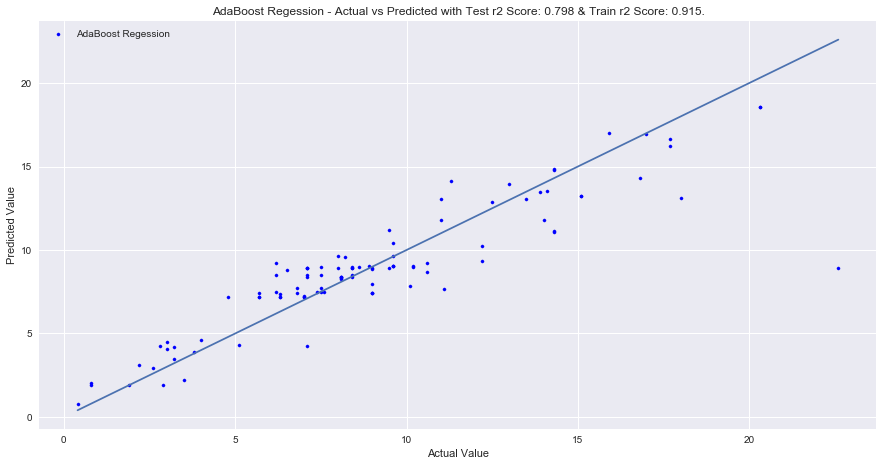

-------------------------------------
Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   10.0s finished


            importance
feature               
FFMC             0.623
DC               0.210
DMC              0.041
wind             0.026
RH               0.022
X                0.019
temp             0.019
day_code         0.019
month_code       0.012
area             0.005
Y                0.004
rain             0.000

The optimal 4 KFolds Cross Validation Mean score on our training data with a Random Forest Regression is 0.6575217727941618
Using the recommended parameters:
{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 88}

The optimal parameters used on the Test Data scored: 0.8214664528372373


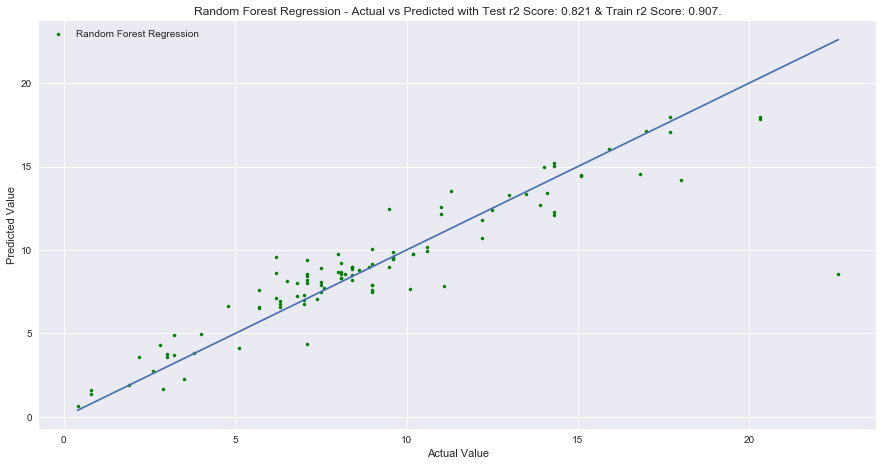

-------------------------------------


In [49]:
#sklearn libraries for actually preforming machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#python library tool to switch variables for independent loops
import itertools

#Gradient Boost Machine Parameters
gbm_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4],
              'learning_rate':[0.01,0.1,0.5,1]}

#Adaboost Parameters
ada_params = {'n_estimators': [50, 100],             
              'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                 DecisionTreeRegressor(max_depth=5), 
                                 DecisionTreeRegressor(max_depth=5)], 
              'learning_rate':[0.01,0.1,0.5,1], 
              'random_state':[88]}

#Random Forest Parameters
rf_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4], 
             'random_state':[88]}

print("Regressions' parameters defined.")
print("-------------------------------------")

#Assign Regression object from Sklearn to a variable
gbm_estimator = GradientBoostingRegressor(**gbm_params)
ada_estimator = AdaBoostRegressor(**ada_params)
rf_estimator = RandomForestRegressor(**rf_params)
print("Regression objects assigned to variables.")
print("-------------------------------------")

#Create a loop cycle for different regression used with GBM being first
regression_names = itertools.cycle(["Gradient Boost Machine Regression", "AdaBoost Regession", "Random Forest Regression"])
parameters_cycle = itertools.cycle([gbm_params, ada_params, rf_params])
regressions_cycle = itertools.cycle([gbm_estimator, ada_estimator, rf_estimator])
colors_cycle = itertools.cycle(["r", "b","g"])

#sklearn libraries for paramter tuning
from sklearn.model_selection import GridSearchCV

#create function to plot actual vs predicted target values
def actual_vs_predicted(predicted_values, regression_names, test_score, train_score, color):   
    plt.figure(figsize=(15,7.5))
    plt.scatter(y_test, predicted_values, color=color, label=regression_names, s=10)
    test_score = np.round(test_score,3)
    train_score = np.round(train_score,3)
    plt.title("{} - Actual vs Predicted with Test r2 Score: {} & Train r2 Score: {}.".format(regression_names, test_score, train_score))
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.legend()
    plt.show()

#Set a loop to go through each regression
for x in range(3):
    #create variables for each cycle iterations
    current_regression = next(regressions_cycle)
    current_parameters = next(parameters_cycle)
    current_reg_name = next(regression_names)
    current_color = next(colors_cycle)
    
    #run through all different parameters setting to find the best score
    run_gridSearchCV = GridSearchCV(current_regression, current_parameters, verbose=1, cv=4).fit(X_train, y_train)
    
    #provide feature importance for each regression model
    importances = pd.DataFrame({'feature':scaled_features_df.columns,'importance':np.round(run_gridSearchCV.best_estimator_.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    print()
    
    #print out best mean cross validation scores
    current_best_cv_score = run_gridSearchCV.best_score_
    print("The optimal 4 KFolds Cross Validation Mean score on our training data with a {} is {}".format(current_reg_name, current_best_cv_score))
    print("Using the recommended parameters:")
    print(run_gridSearchCV.best_params_)
    print()
    
    #run best parameters on training and test data, then assign variables
    current_r2_train_score = run_gridSearchCV.score(X_train,y_train)
    current_r2_test_score = run_gridSearchCV.score(X_test,y_test)
    print("The optimal parameters used on the Test Data scored: {}".format(current_r2_test_score))
    
    #run prediction on test data and assign variable
    current_predicted_values = run_gridSearchCV.predict(X_test)
    
    #place all variables created through function for plotting actual vs predicted values
    actual_vs_predicted(current_predicted_values, current_reg_name, current_r2_test_score, current_r2_train_score, current_color)
    print("-------------------------------------")
    


[Back to Table of Content](#toc)